<a href="https://colab.research.google.com/github/shebegyare131/shebegyare131/blob/main/Copy_of_CSV_FIX__Water_Ahmed_FBprophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt 
import random
import seaborn as sns
from fbprophet import Prophet

In [ ]:
#df=pd.read_csv('QWMS.csv')
#df.head()

import pandas as pd


def remove_timezone_label(data):

    pos = data.index('UTC')

    # Slice data to get rid of the tz, then strip leading/trailing whitespace
    data = (data[:pos]).strip()

    return data


if __name__ == '__main__':
    df=pd.read_csv("QWMS.csv")

    # the apply() function is used to carry out a function on the data.
    df["created_at"] = df["created_at"].apply(remove_timezone_label)

    df.to_csv("QWMS_NEW.csv", index=False)
   
  

In [ ]:
df.head()

,created_at,entry_id,Temperature,Ph,Turbidity,flow,Tds,Pressure,Volume,Color
0,2022-02-12 08:55:48,407,24.94,7.26,3000.0,2,663.44,531.19,2.40,6565
1,2022-02-12 08:56:20,408,24.94,7.39,3000.0,2,672.44,526.14,2.47,6637
2,2022-02-12 08:56:37,409,24.94,7.49,3000.0,2,672.44,523.65,2.52,6644
3,2022-02-12 08:57:05,410,25.00,7.49,3000.0,2,680.36,568.68,1.63,6703
4,2022-02-12 08:57:37,411,25.06,6.88,3000.0,0,684.65,561.91,1.79,7424


In [ ]:

df=df.drop(['created_at'],axis=1)
df=df.drop(['Temperature'],axis=1)
df=df.drop(['Ph'],axis=1)
df=df.drop(['Turbidity'],axis=1)
df=df.drop(['flow'],axis=1)
df=df.drop(['Tds'],axis=1)
#df=df.drop(['Pressure'],axis=1)
df=df.drop(['Volume'],axis=1)
df=df.drop(['Color'],axis=1)
df.head()

,entry_id,Pressure
0,407,531.19
1,408,526.14
2,409,523.65
3,410,568.68
4,411,561.91


In [ ]:
#df.tail(10)


In [ ]:
# Extract all Data Like Year MOnth Day Time etc
#dataset = df
#dataset["Month"] = pd.to_datetime(df["Timeline"]).dt.month
#dataset["Year"] = pd.to_datetime(df["Timeline"]).dt.year
#dataset["Date"] = pd.to_datetime(df["Date"]).dt.date
#dataset["Time"] = pd.to_datetime(df["Timeline"]).dt.time
#dataset["Week"] = pd.to_datetime(df["Date"]).dt.week
#dataset["Day"] = pd.to_datetime(df["Date"]).dt.day_name()
#dataset = df.set_index("Timeline")
#dataset.index = pd.to_datetime(dataset.index)
#dataset
#dataset.head(5)

In [ ]:
#df = df.drop(['Timeline'], axis=1)
#df = df.drop(['alarm'], axis=1)
#df = df.drop(['cng'], axis=1)
#df.head()

In [ ]:
#sns.lineplot(x=df.index, y="temp", data=df);
#sns.lineplot(x=df.index, y="Time", data=df);
#sns.lineplot(x=Time, y="temp", data=df);

In [ ]:
#df = df.drop(['Timeline'], axis=1)
#df = df.drop(['Month'], axis=1)
#df = df.drop(['Year'], axis=1)
#df = df.drop(['co'], axis=1)



df.head()

,created_at,Temperature,Ph,Turbidity,flow,Tds,Pressure,Volume,Color
0,2022-02-12 08:55:48,24.94,7.26,3000.0,2,663.44,531.19,2.40,6565
1,2022-02-12 08:56:20,24.94,7.39,3000.0,2,672.44,526.14,2.47,6637
2,2022-02-12 08:56:37,24.94,7.49,3000.0,2,672.44,523.65,2.52,6644
3,2022-02-12 08:57:05,25.00,7.49,3000.0,2,680.36,568.68,1.63,6703
4,2022-02-12 08:57:37,25.06,6.88,3000.0,0,684.65,561.91,1.79,7424


In [ ]:
df.tail()

,created_at,Temperature,Ph,Turbidity,flow,Tds,Pressure,Volume,Color
95,2022-02-12 09:35:47,25.19,7.95,3000.0,2,0.0,543.53,2.16,7254
96,2022-02-12 09:36:15,25.19,7.89,3000.0,2,0.0,538.03,2.42,7973
97,2022-02-12 09:36:31,25.12,8.37,3000.0,2,0.0,535.56,2.36,7321
98,2022-02-12 09:36:52,25.19,7.96,3000.0,2,0.0,533.33,0.71,7366
99,2022-02-12 09:37:21,25.25,7.98,3000.0,0,0.0,589.49,2.09,7207


In [ ]:
df.isnull().sum()

created_at     0
Temperature    0
Ph             0
Turbidity      0
flow           0
Tds            0
Pressure       0
Volume         0
Color          0
dtype: int64

In [ ]:
df.shape

(100, 9)

In [ ]:
#conversion_rate = 85.33
#df['price'] = conversion_rate * df['price']
#df.head()

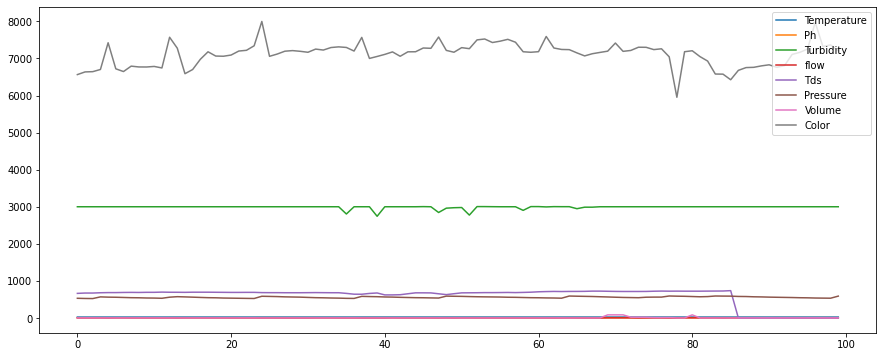

In [ ]:
df.plot(figsize=(15, 6))
plt.show()

In [ ]:
df.columns = ['ds', 'y'] #required by fbprophet
df.head()

,ds,y
0,2022-02-12 08:55:48,531.19
1,2022-02-12 08:56:20,526.14
2,2022-02-12 08:56:37,523.65
3,2022-02-12 08:57:05,568.68
4,2022-02-12 08:57:37,561.91


In [ ]:
df['ds'] = pd.to_datetime(df['ds'])
df.head()

,ds,y
0,2022-02-12 08:55:48,531.19
1,2022-02-12 08:56:20,526.14
2,2022-02-12 08:56:37,523.65
3,2022-02-12 08:57:05,568.68
4,2022-02-12 08:57:37,561.91


In [ ]:
df = df.sort_values(by='ds')
df

,ds,y
0,2022-02-12 08:55:48,531.19
1,2022-02-12 08:56:20,526.14
2,2022-02-12 08:56:37,523.65
3,2022-02-12 08:57:05,568.68
4,2022-02-12 08:57:37,561.91
...,...,...
95,2022-02-12 09:35:47,543.53
96,2022-02-12 09:36:15,538.03
97,2022-02-12 09:36:31,535.56
98,2022-02-12 09:36:52,533.33


In [ ]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_col

In [ ]:
model = Prophet()

In [ ]:
df.columns

Index(['ds', 'y'], dtype='object')

In [ ]:
model.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
model.component_modes

{'additive': ['additive_terms', 'extra_regressors_additive', 'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [ ]:
df.tail()

,ds,y
95,2022-02-12 09:35:47,543.53
96,2022-02-12 09:36:15,538.03
97,2022-02-12 09:36:31,535.56
98,2022-02-12 09:36:52,533.33
99,2022-02-12 09:37:21,589.49


In [ ]:
future_dates = model.make_future_dataframe(periods=2)

In [ ]:
future_dates.tail()

,ds
97,2022-02-12 09:36:31
98,2022-02-12 09:36:52
99,2022-02-12 09:37:21
100,2022-02-13 09:37:21
101,2022-02-14 09:37:21


In [ ]:
pred = model.predict(future_dates)
pred.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-02-12 08:55:48,545.614334,522.696537,567.182618,545.614334,545.614334,0.0,0.0,0.0,0.0,0.0,0.0,545.614334
1,2022-02-12 08:56:20,546.002095,523.597751,567.403738,546.002095,546.002095,0.0,0.0,0.0,0.0,0.0,0.0,546.002095
2,2022-02-12 08:56:37,546.208093,525.533421,568.657990,546.208093,546.208093,0.0,0.0,0.0,0.0,0.0,0.0,546.208093
3,2022-02-12 08:57:05,546.547384,524.787462,569.704105,546.547384,546.547384,0.0,0.0,0.0,0.0,0.0,0.0,546.547384
4,2022-02-12 08:57:37,546.935145,526.343595,567.421834,546.935145,546.935145,0.0,0.0,0.0,0.0,0.0,0.0,546.935145


In [ ]:
pred = pred[['ds', 'yhat']]
pred

,ds,yhat
0,2022-02-12 08:55:48,545.614334
1,2022-02-12 08:56:20,546.002095
2,2022-02-12 08:56:37,546.208093
3,2022-02-12 08:57:05,546.547384
4,2022-02-12 08:57:37,546.935145
...,...,...
97,2022-02-12 09:36:31,563.857788
98,2022-02-12 09:36:52,563.721117
99,2022-02-12 09:37:21,563.532382
100,2022-02-13 09:37:21,1.229998


In [ ]:
#model.plot(pred)
#model.plot(df.columns) 

In [ ]:
#model.plot_components(pred)

In [ ]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='27 min', period='18 min', horizon='9 min')
#df_cv = cross_validation(model, initial=' 14 day', period='7 day ', horizon='14 day')
#df_cv = cross_validation(model, initial='150 min', period='90 min', horizon='150 min')
#df_cv = cross_validation(model, initial='20 min', period='15 min', horizon='30 min')
#df_cv = cross_validation(model, initial='20 min', period='60 min', horizon= '30 min')#mq4 home
#df_cv = cross_validation(model, initial='60 min', period='30 min', horizon= '5 min')#Flame
#df_cv = cross_validation(model, initial='90 min', period='60 min', horizon= '30 min')
#df_cv = cross_validation(model, initial='365 days', period='90 days', horizon='180 days')
#df_cv = cross_validation(model, initial='2 days', period='12 hr', horizon='1 days')
df_cv.head()

INFO:fbprophet:Making 1 forecasts with cutoffs between 2022-02-12 09:28:21 and 2022-02-12 09:28:21


  0%|          | 0/1 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2022-02-12 09:28:47,569.855948,547.042580,590.532893,578.40,2022-02-12 09:28:21
1,2022-02-12 09:29:17,570.238561,547.778750,593.555014,571.89,2022-02-12 09:28:21
2,2022-02-12 09:29:33,570.442621,550.343173,590.651449,577.05,2022-02-12 09:28:21
3,2022-02-12 09:31:27,571.896550,550.457780,593.649313,592.47,2022-02-12 09:28:21
4,2022-02-12 09:31:42,572.087856,550.422767,594.492426,590.24,2022-02-12 09:28:21


In [ ]:


from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,0 days 00:00:56,37.864040,6.153376,5.097746,0.008830,0.008830,1.0
1,0 days 00:01:12,23.192355,4.815844,4.129409,0.007169,0.007169,1.0
2,0 days 00:03:06,233.462157,15.279468,13.590415,0.023088,0.023088,1.0
3,0 days 00:03:21,376.383590,19.400608,19.362797,0.032739,0.032739,1.0
4,0 days 00:03:49,302.447814,17.391027,17.373591,0.029463,0.029463,1.0


/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:526: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:527: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


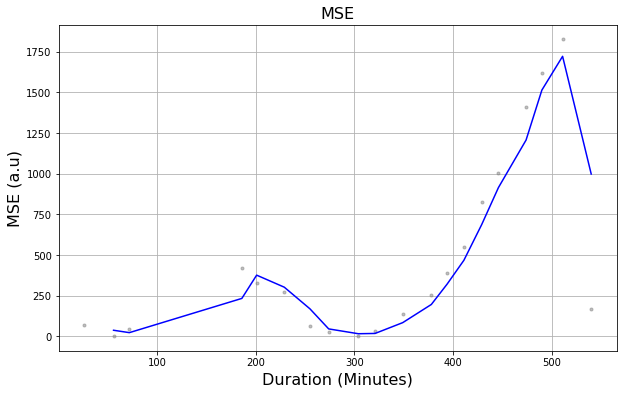

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mse')

#sns.distplot(df["demand"])
#plt.title("Load Consumption")
#plt.plot(df[['demand','forecast']])
plt.xlabel("Duration (Minutes)",{"Size":16})
plt.ylabel("MSE (a.u)",{"Size":16})
plt.title("MSE",{"Size":16})
#plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:526: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:527: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


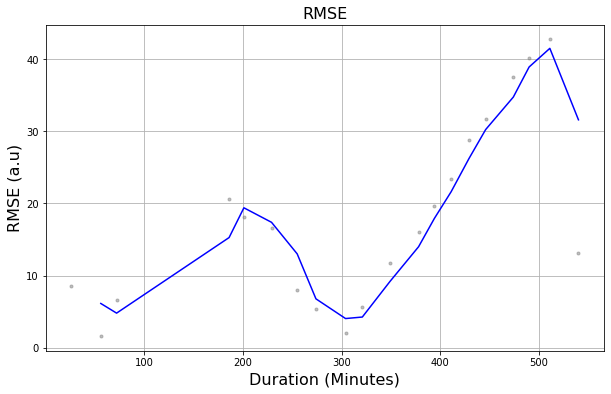

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')
plt.xlabel("Duration (Minutes)",{"Size":16})
plt.ylabel("RMSE (a.u)",{"Size":16})
plt.title("RMSE",{"Size":16})
#plt.legend()
plt.show()

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:526: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:527: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


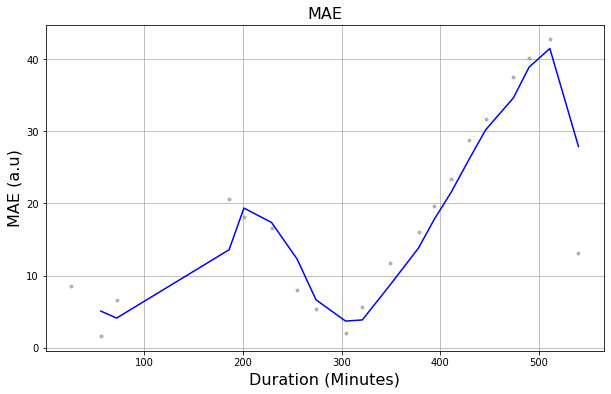

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mae')
plt.xlabel("Duration (Minutes)",{"Size":16})
plt.ylabel("MAE (a.u)",{"Size":16})
plt.title("MAE",{"Size":16})
#plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:526: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:527: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


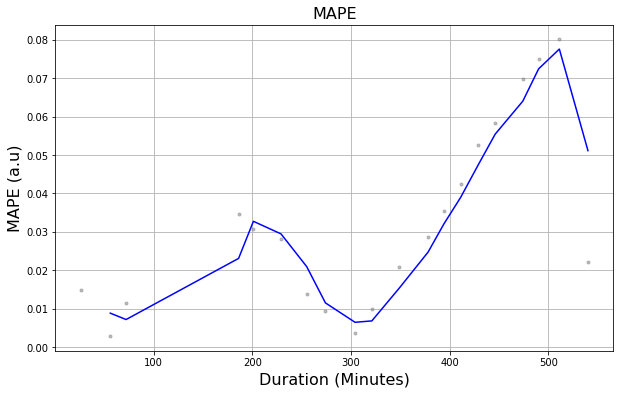

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')
plt.xlabel("Duration (Minutes)",{"Size":16})
plt.ylabel("MAPE (a.u)",{"Size":16})
plt.title("MAPE",{"Size":16})
#plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:526: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:527: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


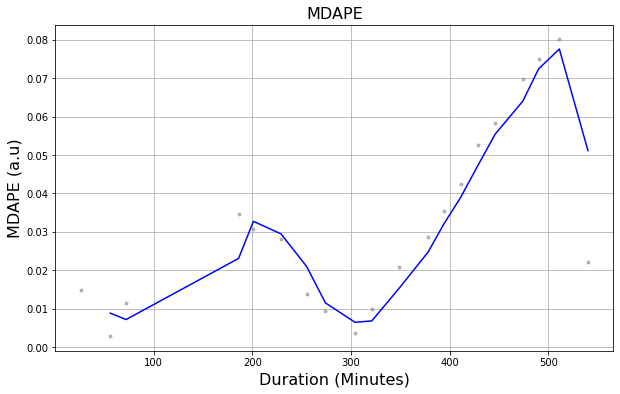

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mdape')
plt.xlabel("Duration (Minutes)",{"Size":16})
plt.ylabel("MDAPE (a.u)",{"Size":16})
plt.title("MDAPE",{"Size":16})
#plt.legend()
plt.show()